<a href="https://colab.research.google.com/github/cncs-fit/.github/blob/master/%E3%83%95%E3%83%A9%E3%82%AF%E3%82%BF%E3%83%AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **コッホ曲線**

## ↓逐次的な再帰(IFSではない)

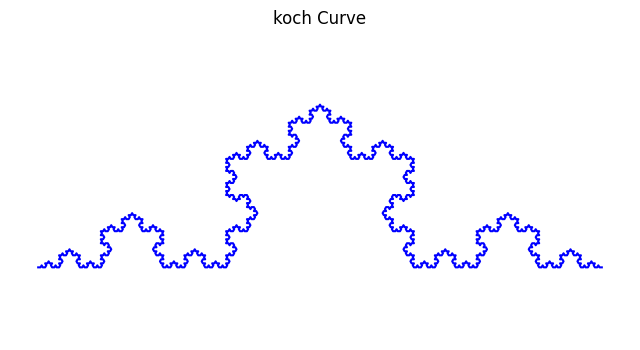

In [ ]:
import torch
import matplotlib.pyplot as plt
import math

#初期の線分：原点から右方向への水平線
points = torch.tensor([[0.0, 0.0],[1.0, 0.0]])

def koch_step(points):
  new_points = [points[0]]
  for i in range(1, len(points)):
    p1 = points[i - 1]
    p2 = points[i]
    delta = p2 - p1

    #各分割の計算
    a = p1 + delta / 3
    b = p1 + delta * 2 / 3

    #正三角形の頂点
    angle = math.radians(torch.tensor(60.0))
    rotation_matrix = torch.tensor([
        [math.cos(angle), -math.sin(angle)], #回転
        [math.sin(angle), math.cos(angle)]   #　行列
    ])
    peak = a + torch.matmul(rotation_matrix, (b - a))

    #新しい点列の追加：p1 → a → peak → b →p2
    new_points.extend([a, peak, b, p2])
  return torch.stack(new_points)

#再帰回数
iterations = 5
for _ in range(iterations):
  points = koch_step(points)

#描画
plt.figure(figsize=(8, 4))
plt.plot(points[:, 0].numpy(), points[:, 1].numpy(), color='blue')
plt.axis('equal')
plt.axis('off')
plt.title('koch Curve')
plt.show()

| 繰り返し回数（n） | 線分の数 |
| ------------------| -------- |
| 0（初期）         | 1        |
| 1                 | 4        |
| 2                 | 16       |
| 3                 | 64       |
| 4                 | 256      |
| 5                 | 1024     |


## ↓IFS版コッホ曲線

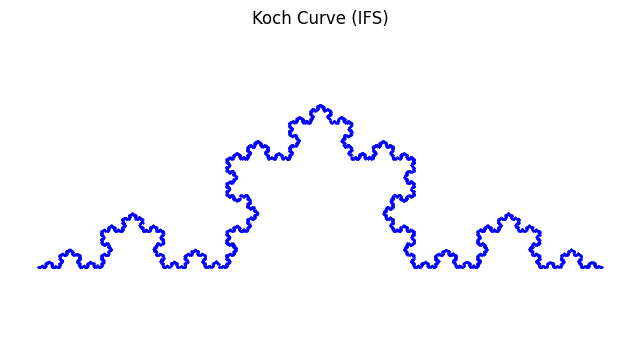

In [ ]:
import torch
import matplotlib.pyplot as plt
import math

#初期点
x = torch.tensor(0.0)
y = torch.tensor(0.0)
#保存用tensor(1万点)
num_points = 10000
points = torch.zeros((num_points, 2))#1万×2の行列

#定義1
s = 1 / 3 #線の長さを縮める,
t = math.radians(60) #60度をラジアンに変換
#定義2,60度回転のための三角関数値
cos_t = math.cos(t)
sin_t = math.sin(t)

#ループで点を生成
for i in range(num_points):
  r = torch.randint(0, 100, (1,)).item() #整数で0～99の値をランダムに生成,

  #それぞれ確率25%ずつ
  if r < 25: #アフィン変換1:左端の短い線分
    #原点からの線の縮小
    x1 = s * x
    y1 = s * y

  elif r < 50: #アフィン変換2:回転して上に折れる部分(山形の左斜辺)
    #x,yを60°回転,x方向に少し平行移動(+s)->斜め左上に出る山の部分
    x1 = s * cos_t * x - s * sin_t * y + s
    y1 = s * sin_t * x + s * cos_t * y

  elif r < 75: #アフィン変換3:回転して右に戻る部分(山の右斜変)
    #-60°回転し、山の右辺を形成,xとy方向に平行移動
    x1 = s * cos_t * x + s * sin_t * y + cos_t
    y1 = -s * sin_t * x + s * cos_t * y + s * sin_t

  else: #アフィン変換4:右端の直線部分
    #xを右に2/3移動した直線部分
    x1 = s * x + 2 * s
    y1 = s * y

  x,y = x1, y1
  points[i] = torch.tensor([x, y ])

# 描画
plt.figure(figsize=(8, 4))
plt.scatter(points[:, 0] * 512, points[:, 1] * 512, s=0.1, color='blue')
plt.axis('equal')
plt.axis('off')#目盛りのon,off
plt.title("Koch Curve (IFS)")
plt.show()

・IFS方式は「全体の構造が点の集まりとしてランダムに拡がる」ので、「1本の線を追う」ことには向いていない  
・いくつかのアフィン変換（線形変換＋平行移動）を確率的に選択して反復的に適用

## ↓反転させたやつ



---



```
# points[i] = torch.tensor([x, -y ])ここを-にしただけ
```


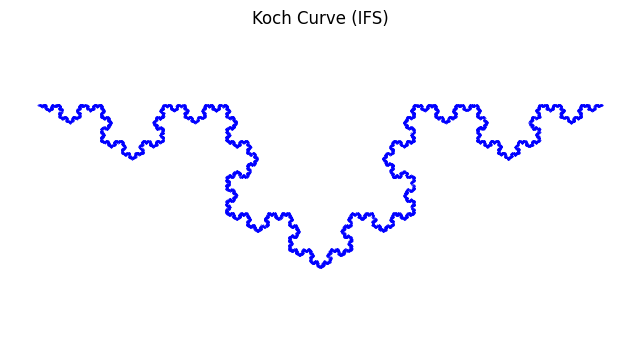

In [ ]:
import torch
import matplotlib.pyplot as plt
import math

#初期点
x = torch.tensor(0.0)
y = torch.tensor(0.0)
#保存用tensor(1万点)
num_points = 10000
points = torch.zeros((num_points, 2))#1万×2の行列

#定義1
s = 1 / 3 #線の長さを縮める,
t = math.radians(60) #60度をラジアンに変換
#定義2,60度回転のための三角関数値
cos_t = math.cos(t)
sin_t = math.sin(t)

#ループで点を生成
for i in range(num_points):
  r = torch.randint(0, 100, (1,)).item() #整数で0～99の値をランダムに生成,

  #それぞれ確率25%ずつ
  if r < 25: #アフィン変換1:左端の短い線分
    #原点からの線の縮小
    x1 = s * x
    y1 = s * y

  elif r < 50: #アフィン変換2:回転して上に折れる部分(山形の左斜辺)
    #x,yを60°回転,x方向に少し平行移動(+s)->斜め左上に出る山の部分
    x1 = s * cos_t * x - s * sin_t * y + s
    y1 = s * sin_t * x + s * cos_t * y

  elif r < 75: #アフィン変換3:回転して右に戻る部分(山の右斜変)
    #-60°回転し、山の右辺を形成,xとy方向に平行移動
    x1 = s * cos_t * x + s * sin_t * y + cos_t
    y1 = -s * sin_t * x + s * cos_t * y + s * sin_t

  else: #アフィン変換4:右端の直線部分
    #xを右に2/3移動した直線部分
    x1 = s * x + 2 * s
    y1 = s * y

  x,y = x1, y1
  points[i] = torch.tensor([x, -y ])

# 描画
plt.figure(figsize=(8, 4))
plt.scatter(points[:, 0] * 512, points[:, 1] * 512, s=0.1, color='blue')
plt.axis('equal')
plt.axis('off')#目盛りのon,off
plt.title("Koch Curve (IFS)")
plt.show()

# **シェルピンスキー**

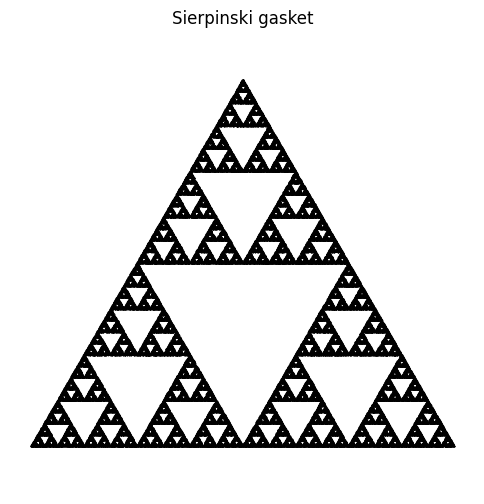

In [ ]:
import torch
import matplotlib.pyplot as plt
import math

# 初期点（原点）
Xn = torch.tensor(0.0)
Yn = torch.tensor(0.0)

# 結果を保存する
num_points = 100_000#10万点
points = torch.zeros((num_points, 2))#10万×2の行列

# IFSによる生成
for n in range(num_points):
    r = torch.rand(1).item() * 100  # 0〜100のランダム値

    #
    if r < 33:#確率33%,アフィン変換1:左下の三角形部分
        #点を(0,0)に向かって縮小(0.5x,0.5y)
        X1 = 0.5 * Xn
        Y1 = 0.5 * Yn
    elif r < 66:#確率33%,アフィン変換2:上の三角形部分
        #点を縮小 ＋ 上方向へ平行移動
        X1 = 0.5 * Xn + 0.25
        Y1 = 0.5 * Yn + math.sqrt(3) / 4 #√3/2の半分
    else:#確率34%,アフィン変換3:右下の三角形部分
        #点を縮小 + 右に移動
        X1 = 0.5 * Xn + 0.5
        Y1 = 0.5 * Yn

    Xn = X1
    Yn = Y1
    points[n] = torch.tensor([Xn, Yn]) #1-ynにしたらさかさまになる

# 描画
plt.figure(figsize=(6, 6))
plt.scatter(points[:, 0].numpy(), points[:, 1].numpy(), s=0.1, color='black')
plt.axis('equal')
plt.axis('off')
plt.title('Sierpinski gasket')
plt.show()

## ↓配置を指定してみた

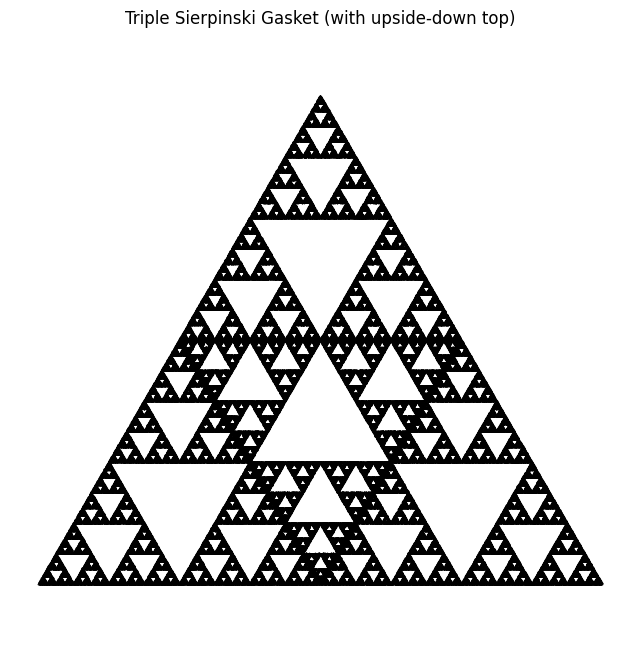

In [ ]:
import torch
import matplotlib.pyplot as plt
import math

# 点の数（3倍に増やす）
num_points = 300_000

# 初期点
Xn = torch.tensor(0.0)
Yn = torch.tensor(0.0)

# 結果格納用
points = torch.zeros((num_points, 2))

for n in range(num_points):
    r = torch.rand(1).item() * 100

    # IFSの3変換（基本の三角形）
    if r < 33:
        X1 = 0.5 * Xn
        Y1 = 0.5 * Yn
    elif r < 66:
        X1 = 0.5 * Xn + 0.25
        Y1 = 0.5 * Yn + math.sqrt(3) / 4
    else:
        X1 = 0.5 * Xn + 0.5
        Y1 = 0.5 * Yn

    # どこに配置するか（4パターン）
    mode = n % 4
    if mode == 0:
        # 左側
        final_x = X1
        final_y = Y1
    elif mode == 1:
        # 右側
        final_x = X1 + 1.0
        final_y = Y1
    elif mode == 2:
        # 上側、逆さ
        final_x = X1 + 0.5
        final_y = -Y1 + math.sqrt(3) / 2
    else:
        #上側
        final_x = X1 + 0.5
        final_y = Y1 + math.sqrt(3) / 2

    Xn = X1
    Yn = Y1
    points[n] = torch.tensor([final_x, final_y])

# 描画
plt.figure(figsize=(8, 8))
plt.scatter(points[:, 0].numpy(), points[:, 1].numpy(), s=0.1, color='black')
plt.axis('equal')
plt.axis('off')
plt.title('Triple Sierpinski Gasket (with upside-down top)')
plt.show()


# **シダ**

シダを構成するために用いられる以下のアフィン変換

| 変換 | 数式                                           | 適用確率 |
| -- | -------------------------------------------- | ---- |
| f1 | x = 0, y = 0.16y                             | 1%   |
| f2 | x = 0.2x - 0.26y, y = 0.23x + 0.22y + 1.6    | 7%   |
| f3 | x = -0.15x + 0.28y, y = 0.26x + 0.24y + 0.44 | 7%   |
| f4 | x = 0.85x + 0.04y, y = -0.04x + 0.85y + 1.6  | 85%  |


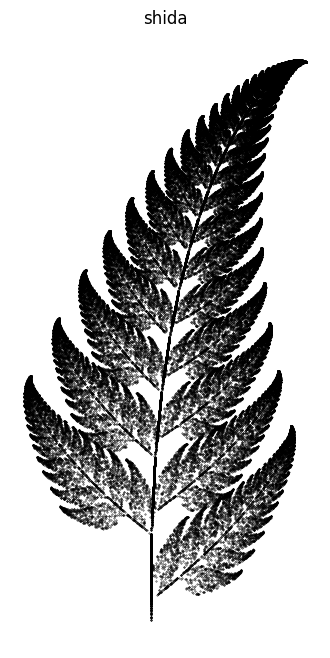

In [ ]:
import torch
import matplotlib.pyplot as plt

# 初期点：この点から繰り返し変換を行い、新しい点を生成
x = torch.tensor(0.0)
y = torch.tensor(0.0)

# 保存用tensor（10万点）
num_points = 100_000 #描画する点の数ー＞多いほど精密
points = torch.zeros((num_points, 2)) #描画する点の数×2の行列(全ての値が0)

for n in range(num_points):
    r = torch.rand(1).item() * 100  # 0〜100のランダム値 #0.0～100の浮動小数点になる

    #用意されている漸化式(アフィン変換),確率でどれか選ぶ？
    if r < 1: #確率1%でシダの茎を作る変換
        x1 = 0.0
        y1 = 0.16 * y
    elif r < 8: #確率7%でシダの左側の小さな葉
        x1 = 0.2 * x - 0.26 * y
        y1 = 0.23 * x + 0.22 * y + 1.6
    elif r < 15: #確率7%でシダの右側の小さな葉
        x1 = -0.15 * x + 0.28 * y
        y1 = 0.26 * x + 0.24 * y + 0.44
    else: #確率85%でメインの葉の形を作る変換。
        x1 = 0.85 * x + 0.04 * y
        y1 = -0.04 * x + 0.85 * y + 1.6

    #更新された点をセットし、pointsに保存
    x = x1
    y = y1
    points[n] = torch.tensor([x, y])

# 座標スケーリング(見やすくするために拡大してるだけ)
points *= 40
# 描画
plt.figure(figsize=(4, 8))
plt.scatter(points[:, 0].numpy(), points[:, 1].numpy(), s=0.1, color='black')
plt.axis('off')
plt.title("shida")
plt.show()